In [1]:
%matplotlib inline
from __future__ import division
import om10,os
import numpy as np
import matplotlib.pyplot as plt
import triangle

In [3]:
#  RA   Dec   redshift   u    g   r   i   z
data = np.loadtxt(os.path.expandvars('$OM10_DIR/data/CFHTLS_LRGs.txt'))

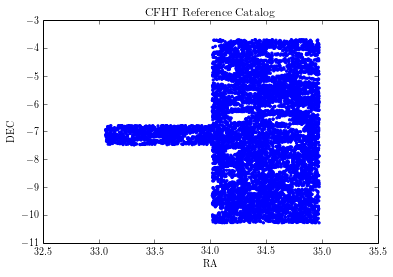

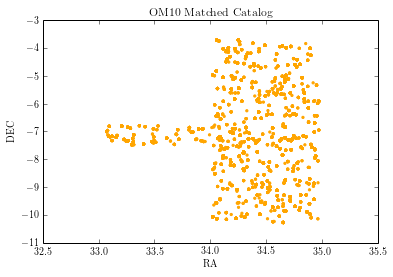

In [13]:
plt.scatter(data[:,0],data[:,1],color='Blue',marker='.')
plt.title('CFHT Reference Catalog')
plt.xlabel('RA')
plt.ylabel('DEC')

db = om10.DB(catalog='$OM10_DIR/notebooks/painted_positioned_catalog.fits')
plt.figure()
matched = db.lenses[db.lenses['DEC'] > -99]
plt.scatter(matched['RA'],matched['DEC'],color='Orange',marker='.')
plt.title('OM10 Matched Catalog')
plt.xlabel('RA')
plt.ylabel('DEC')

We see that the strange footprint observed in our OM10 matched catalog comes directly from the footprint of the input CFHTLS catalog

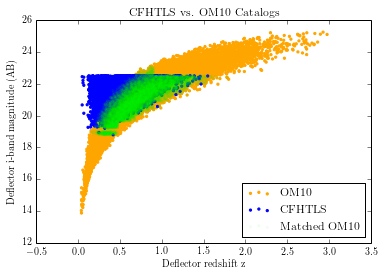

In [36]:
plt.scatter(db.lenses['ZLENS'],db.lenses['APMAG_I'],color='Orange',marker='.',label='OM10')
plt.scatter(data[:,2],data[:,6],color='Blue',marker='.',label='CFHTLS')
plt.scatter(matched['ZLENS'],matched['APMAG_I'],color='Lime',marker='.',label='Matched OM10',alpha=.05)
plt.title('CFHTLS vs. OM10 Catalogs')
plt.xlabel('Deflector redshift z')
plt.ylabel('Deflector i-band magnitude (AB)')
plt.legend(loc=4)

Clearly, the OM10 catalog is extended in MAGI/z space well beyond the CFHT reference.

In [30]:
print len(matched)/len(db.lenses)

0.669434155065


In [50]:
db.select_random(maglim=21.4,area=100000.0,IQ=1.0)

om10.DB: selection yields  3317  lenses


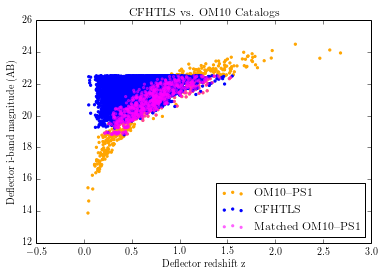

In [39]:
ps1matched = db.sample[db.sample['DEC'] > -99]
plt.scatter(db.sample['ZLENS'],db.sample['APMAG_I'],color='Orange',marker='.',label='OM10--PS1')
plt.scatter(data[:,2],data[:,6],color='Blue',marker='.',label='CFHTLS')
plt.scatter(ps1matched['ZLENS'],ps1matched['APMAG_I'],color='Fuchsia',marker='.',label='Matched OM10--PS1',alpha=.5)
plt.title('CFHTLS vs. OM10 Catalogs')
plt.xlabel('Deflector redshift z')
plt.ylabel('Deflector i-band magnitude (AB)')
plt.legend(loc=4)

In [34]:
print len(ps1matched)/len(db.sample)

0.732663316583
